In [1]:
# Cell 1: Setup and File Upload

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

sns.set_theme(style="whitegrid")

print("Please upload the 'results.csv' file from your training run.")
uploaded = files.upload()

try:
    file_name = next(iter(uploaded))
    print(f"\n✅ Successfully uploaded '{file_name}'")
except StopIteration:
    print("\n❌ No file was uploaded. Please run the cell again.")

Please upload the 'results.csv' file from your training run.


Saving results.csv to results.csv

✅ Successfully uploaded 'results.csv'


In [2]:
# Cell 2: Load and Prepare Data

if 'file_name' in locals():
    df = pd.read_csv("results.csv")
    df.columns = df.columns.str.strip().str.replace('/', '_').str.replace('(B)', '', regex=False)

    print("Data loaded successfully. Here are the first 5 rows:")
    display(df.head())
else:
    print("❌ Please run Cell 1 first to upload your data.")

Data loaded successfully. Here are the first 5 rows:


,epoch,time,train_box_loss,train_cls_loss,train_dfl_loss,metrics_precision,metrics_recall,metrics_mAP50,metrics_mAP50-95,val_box_loss,val_cls_loss,val_dfl_loss,lr_pg0,lr_pg1,lr_pg2
0,1,291.832,3.88063,3.30234,2.76888,0.21824,0.12962,0.08132,0.02780,2.95312,2.46180,2.05253,0.068373,0.001665,0.001665
1,2,574.899,2.50257,1.84957,1.64362,0.54981,0.28005,0.29427,0.12899,2.10023,1.47281,1.47551,0.036703,0.003328,0.003328
2,3,857.009,2.09484,1.41735,1.37753,0.67957,0.34195,0.38066,0.18313,1.86251,1.21263,1.34475,0.005020,0.004978,0.004978
3,4,1137.250,1.87899,1.21617,1.27506,0.72248,0.40762,0.46249,0.22220,1.70898,1.05221,1.24135,0.004956,0.004956,0.004956
4,5,1418.190,1.75688,1.07676,1.21044,0.75589,0.44654,0.50397,0.25217,1.61012,0.97464,1.19793,0.004922,0.004922,0.004922


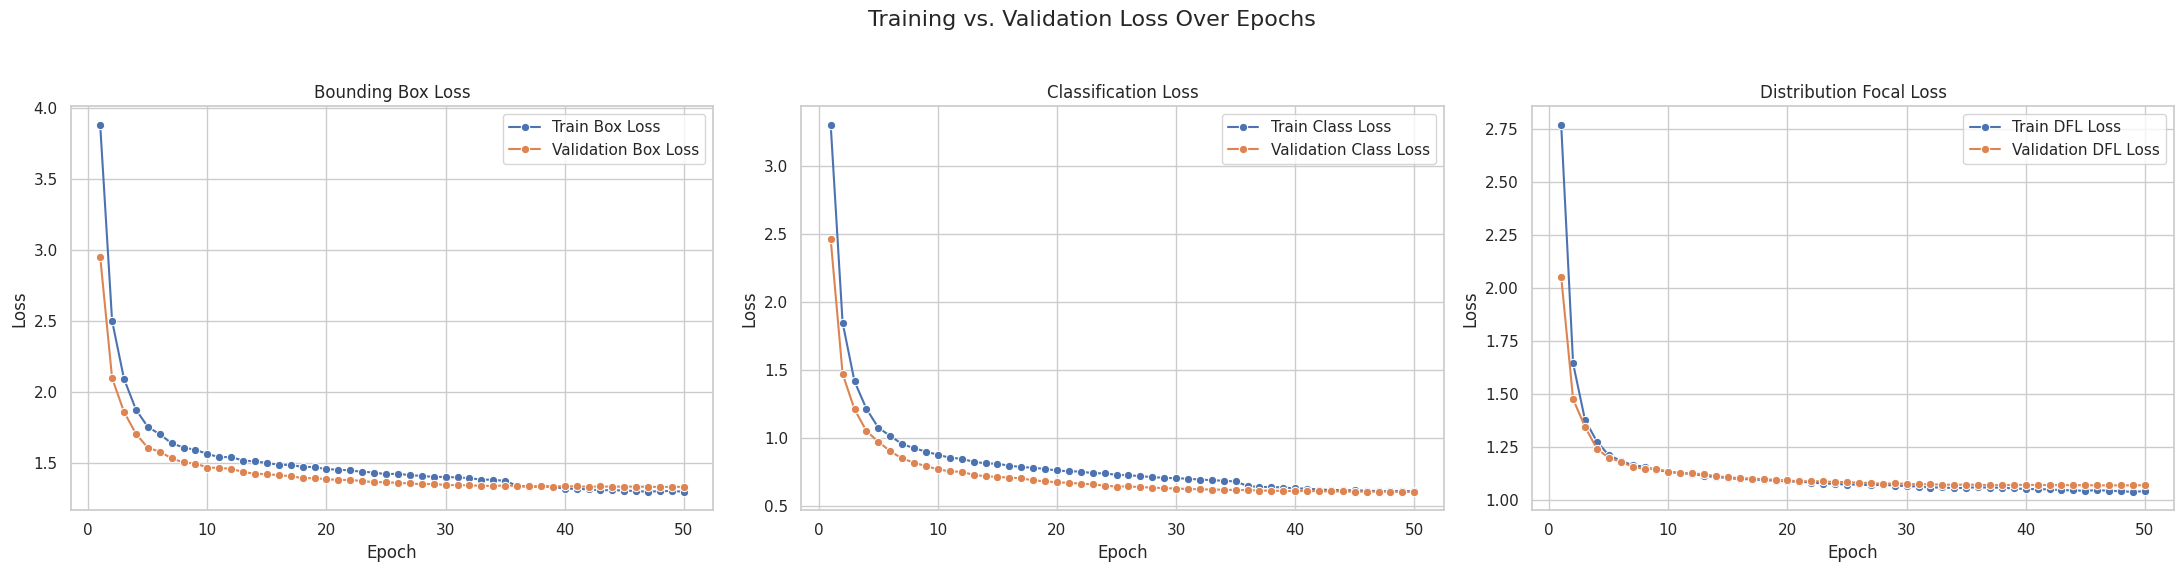

In [3]:
# Cell 3: Plot 1 - Combined Training vs. Validation Loss

if 'df' in locals():
    fig, axes = plt.subplots(1, 3, figsize=(22, 6))
    fig.suptitle('Training vs. Validation Loss Over Epochs', fontsize=16)

    # Plot 1: Box Loss
    sns.lineplot(ax=axes[0], x='epoch', y='train_box_loss', data=df, label='Train Box Loss', marker='o')
    sns.lineplot(ax=axes[0], x='epoch', y='val_box_loss', data=df, label='Validation Box Loss', marker='o')
    axes[0].set_title('Bounding Box Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True)

    # Plot 2: Classification Loss
    sns.lineplot(ax=axes[1], x='epoch', y='train_cls_loss', data=df, label='Train Class Loss', marker='o')
    sns.lineplot(ax=axes[1], x='epoch', y='val_cls_loss', data=df, label='Validation Class Loss', marker='o')
    axes[1].set_title('Classification Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    # Plot 3: DFL Loss
    sns.lineplot(ax=axes[2], x='epoch', y='train_dfl_loss', data=df, label='Train DFL Loss', marker='o')
    sns.lineplot(ax=axes[2], x='epoch', y='val_dfl_loss', data=df, label='Validation DFL Loss', marker='o')
    axes[2].set_title('Distribution Focal Loss')
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Loss')
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

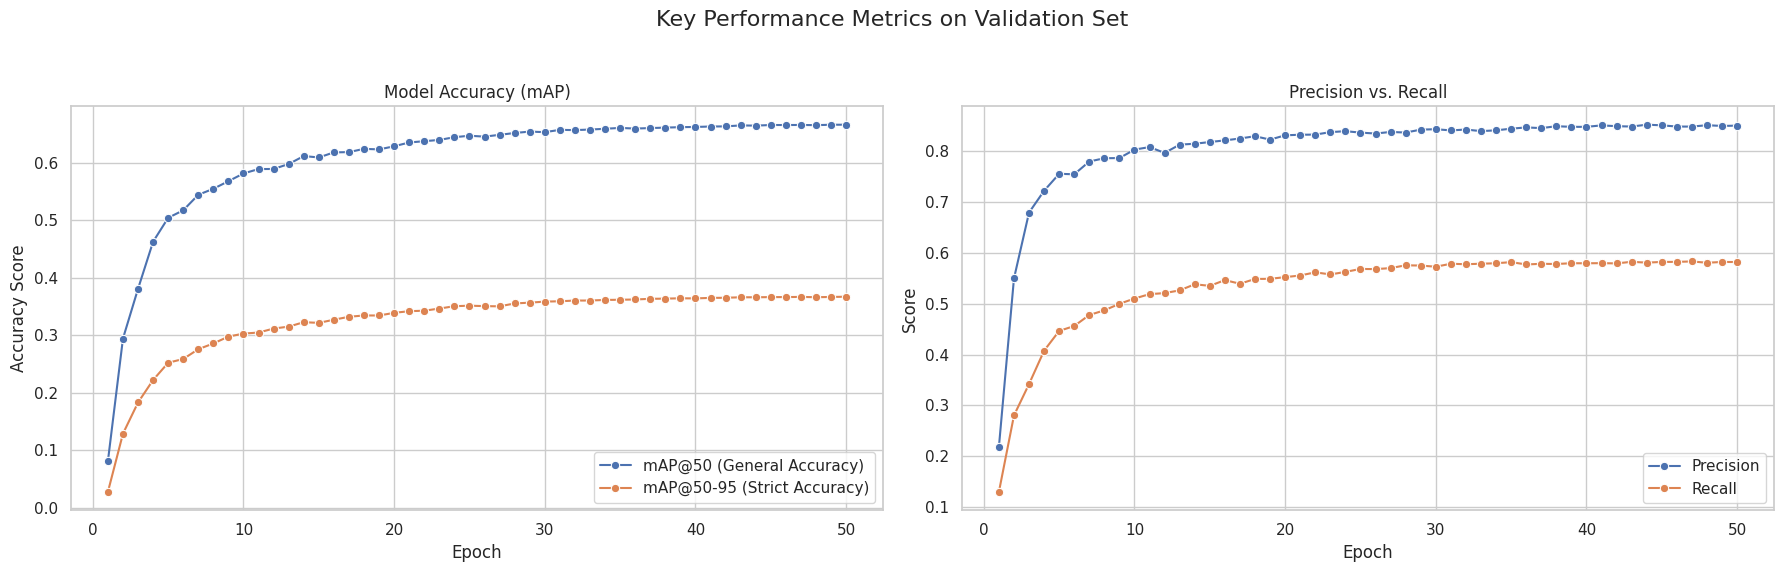

In [4]:
# Cell 4: Plot 2 - Key Performance Metrics

if 'df' in locals():
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle('Key Performance Metrics on Validation Set', fontsize=16)

    # Plot 1: Mean Average Precision (mAP)
    sns.lineplot(ax=axes[0], x='epoch', y='metrics_mAP50', data=df, label='mAP@50 (General Accuracy)', marker='o')
    sns.lineplot(ax=axes[0], x='epoch', y='metrics_mAP50-95', data=df, label='mAP@50-95 (Strict Accuracy)', marker='o')
    axes[0].set_title('Model Accuracy (mAP)')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy Score')
    axes[0].legend()
    axes[0].grid(True)

    # Plot 2: Precision and Recall
    sns.lineplot(ax=axes[1], x='epoch', y='metrics_precision', data=df, label='Precision', marker='o')
    sns.lineplot(ax=axes[1], x='epoch', y='metrics_recall', data=df, label='Recall', marker='o')
    axes[1].set_title('Precision vs. Recall')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Score')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

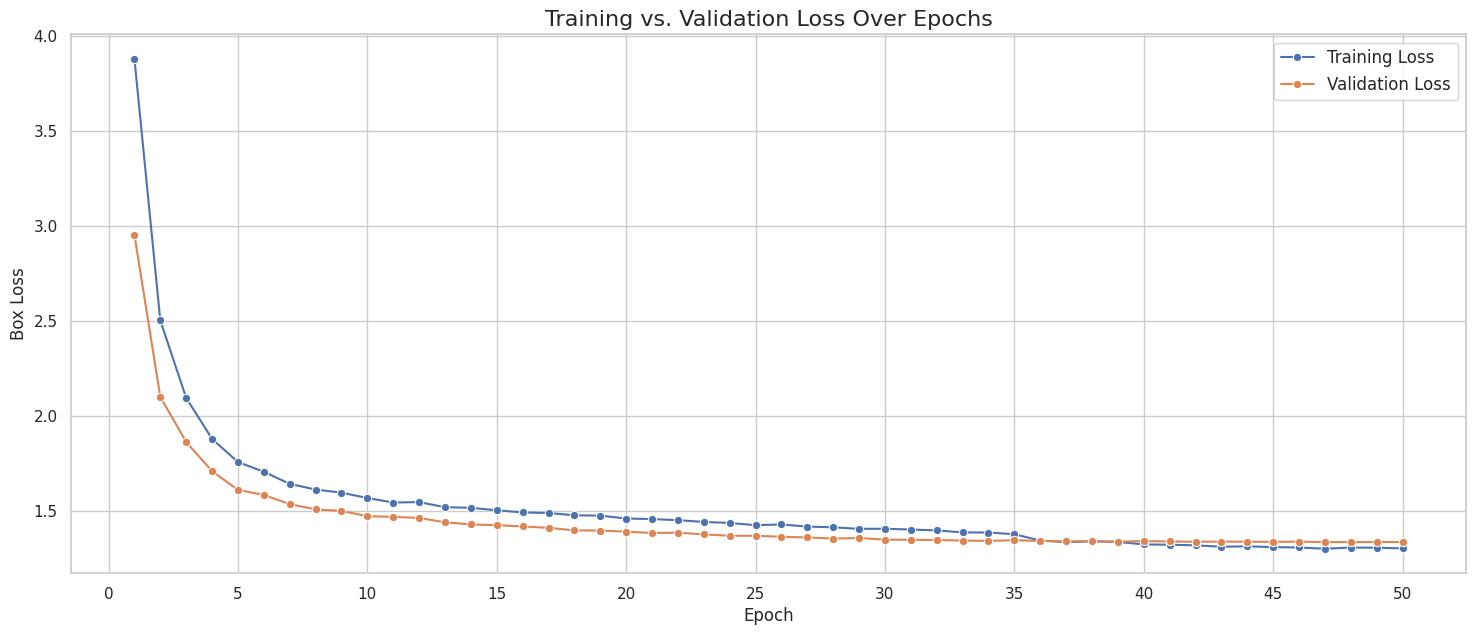

In [5]:
# Cell 5: Plot 3 - Training vs. Validation Loss Comparison

if 'df' in locals():
    plt.figure(figsize=(18, 7))
    sns.lineplot(x='epoch', y='train_box_loss', data=df, label='Training Loss', marker='o')
    sns.lineplot(x='epoch', y='val_box_loss', data=df, label='Validation Loss', marker='o')
    plt.title('Training vs. Validation Loss Over Epochs', fontsize=16)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Box Loss', fontsize=12)
    plt.xticks(ticks=range(0, 51, 5))
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()